In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Life_Expectancy_Data.csv')

In [2]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [3]:
dataset = dataset[['Life_expectancy','Alcohol','percentage_expenditure',' BMI ','GDP','Income_composition_of_resources']]

In [4]:
dataset

,Life_expectancy,Alcohol,percentage_expenditure,BMI,GDP,Income_composition_of_resources
0,65.0,0.01,71.279624,19.1,584.259210,0.479
1,59.9,0.01,73.523582,18.6,612.696514,0.476
2,59.9,0.01,73.219243,18.1,631.744976,0.470
3,59.5,0.01,78.184215,17.6,669.959000,0.463
4,59.2,0.01,7.097109,17.2,63.537231,0.454
...,...,...,...,...,...,...
2933,44.3,4.36,0.000000,27.1,454.366654,0.407
2934,44.5,4.06,0.000000,26.7,453.351155,0.418
2935,44.8,4.43,0.000000,26.3,57.348340,0.427
2936,45.3,1.72,0.000000,25.9,548.587312,0.427


In [5]:
dataset.dropna(subset = ["Life_expectancy","Alcohol"," BMI ","percentage_expenditure","GDP","Income_composition_of_resources"], inplace=True)

In [6]:
dataset.isna().sum()

Life_expectancy                    0
Alcohol                            0
percentage_expenditure             0
 BMI                               0
GDP                                0
Income_composition_of_resources    0
dtype: int64

In [7]:
df=(dataset[['Life_expectancy','Alcohol','percentage_expenditure',' BMI ','GDP','Income_composition_of_resources']] != 0).all(axis=1)

In [8]:
df

0        True
1        True
2        True
3        True
4        True
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2311, dtype: bool

In [9]:
dataset = dataset.loc[df]

In [10]:
dataset

,Life_expectancy,Alcohol,percentage_expenditure,BMI,GDP,Income_composition_of_resources
0,65.0,0.01,71.279624,19.1,584.259210,0.479
1,59.9,0.01,73.523582,18.6,612.696514,0.476
2,59.9,0.01,73.219243,18.1,631.744976,0.470
3,59.5,0.01,78.184215,17.6,669.959000,0.463
4,59.2,0.01,7.097109,17.2,63.537231,0.454
...,...,...,...,...,...,...
2928,50.0,4.64,1.040021,29.0,65.824121,0.419
2929,48.2,3.56,20.843429,28.6,325.678573,0.421
2930,46.6,3.88,29.814566,28.2,396.998217,0.414
2931,45.4,4.57,34.262169,27.9,414.796232,0.408


In [11]:
x = dataset[['Alcohol','percentage_expenditure',' BMI ','GDP','Income_composition_of_resources']]
y = dataset.Life_expectancy 

In [12]:
x

,Alcohol,percentage_expenditure,BMI,GDP,Income_composition_of_resources
0,0.01,71.279624,19.1,584.259210,0.479
1,0.01,73.523582,18.6,612.696514,0.476
2,0.01,73.219243,18.1,631.744976,0.470
3,0.01,78.184215,17.6,669.959000,0.463
4,0.01,7.097109,17.2,63.537231,0.454
...,...,...,...,...,...
2928,4.64,1.040021,29.0,65.824121,0.419
2929,3.56,20.843429,28.6,325.678573,0.421
2930,3.88,29.814566,28.2,396.998217,0.414
2931,4.57,34.262169,27.9,414.796232,0.408


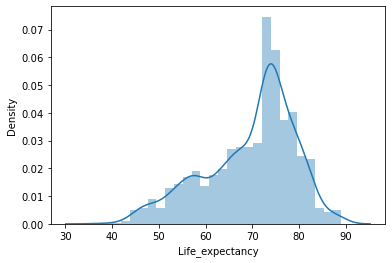

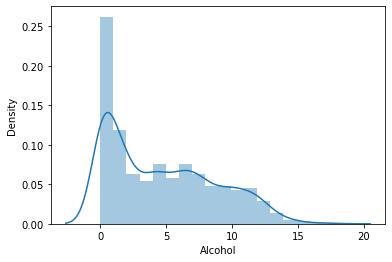

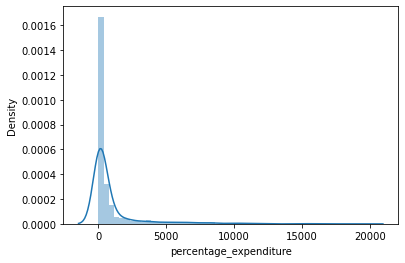

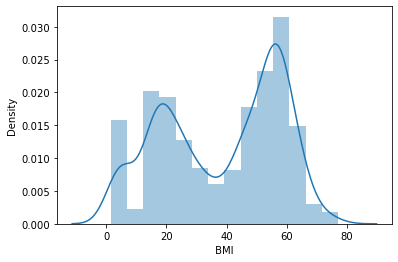

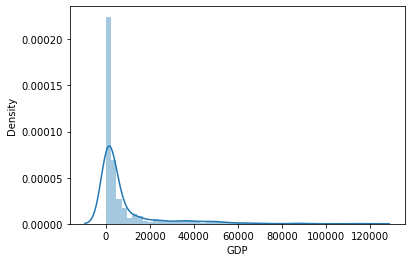

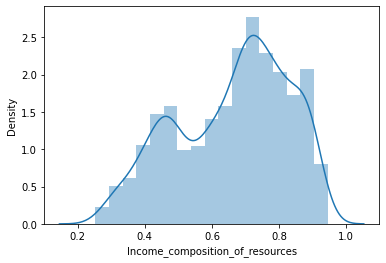

In [13]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

features_number = dataset.columns[dataset.dtypes != "object"]
for i in features_number:
    plt.figure()
    sns.distplot(dataset[i])

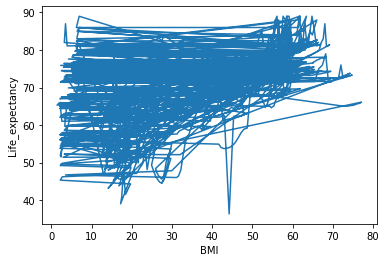

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 8, shuffle = False)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [17]:
reg.score(x_train,y_train)

0.8233709106728602

In [18]:
reg.score(x_test,y_test)

0.7777619235219634

In [19]:
x_train

,Alcohol,percentage_expenditure,BMI,GDP,Income_composition_of_resources
0,0.01,71.279624,19.1,584.259210,0.479
1,0.01,73.523582,18.6,612.696514,0.476
2,0.01,73.219243,18.1,631.744976,0.470
3,0.01,78.184215,17.6,669.959000,0.463
4,0.01,7.097109,17.2,63.537231,0.454
...,...,...,...,...,...
1946,0.04,57.877363,22.5,1226.215314,0.525
1947,0.04,0.667515,21.9,14.142268,0.521
1948,0.03,0.697216,21.3,16.639990,0.514
1949,0.03,5.447134,2.6,139.312880,0.513


In [20]:
y_train

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
1946    65.5
1947    65.1
1948    64.8
1949    64.6
1950    64.4
Name: Life_expectancy, Length: 1535, dtype: float64

In [21]:
y_test

1951    64.2
1952    62.9
1953    63.7
1954    63.5
1955    63.2
        ... 
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
Name: Life_expectancy, Length: 659, dtype: float64

In [22]:
reg.coef_

array([-3.73511391e-01,  9.92082237e-04,  1.99061567e-02, -1.44181981e-04,
        5.46794440e+01])

In [23]:
reg.intercept_

34.74131554332306

In [24]:
predictions = reg.predict(x_train)

In [25]:
predictions

array([61.29571728, 61.11985191, 60.77877379, ..., 63.25763804,
       62.81773856, 62.37515441])

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predictions,y_train)

16.988453810787114

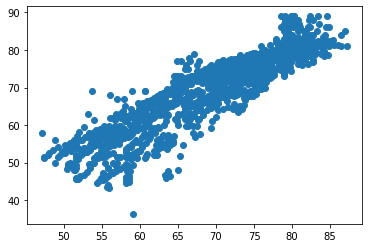

In [27]:
plt.scatter(predictions,y_train)